## Visual reponse basic 2D clustering

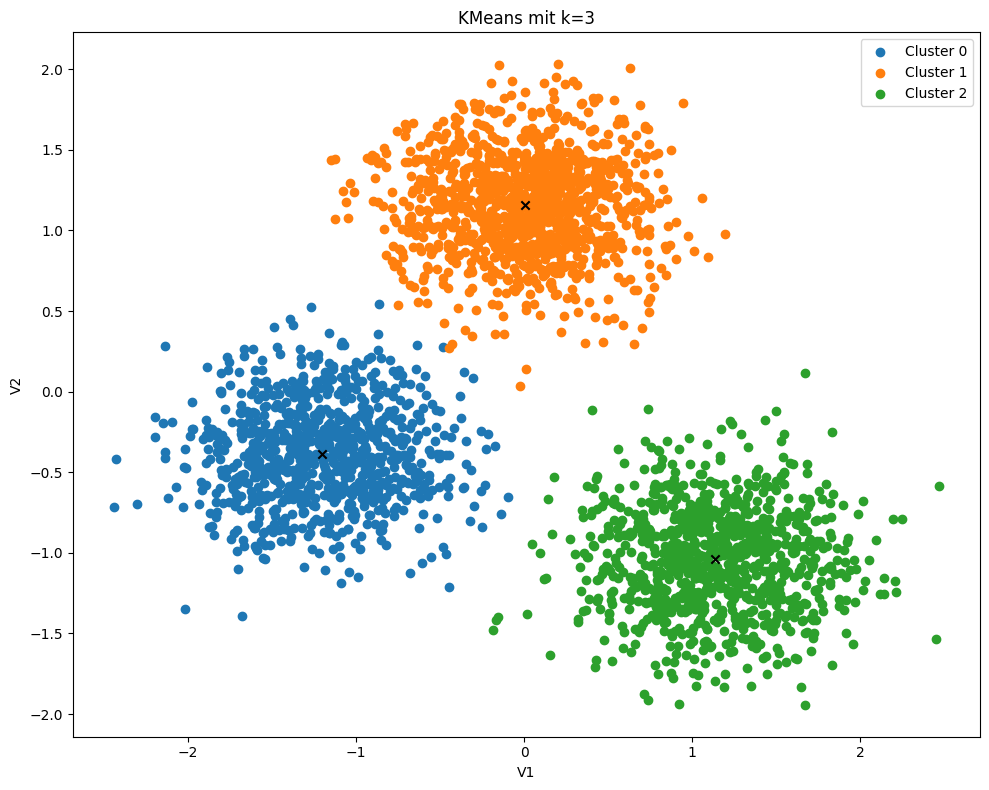

In [217]:
import requests
import json
import matplotlib.pyplot as plt

# Endpunkt für basic KMeans Route 
url = "http://localhost:8080/basic/perform-2d-kmeans/"

# Daten für die Anfrage
params = {
    "Column 1": 0,
    "Column 2": 1,
    "distance_metric": "EUCLIDEAN",
    "kmeans_type": "OptimizedKMeans",
    "n_clusters": 3,
    "user_id": 0,
    "request_id": 0
}

files = {
  "file": open("xclara.csv", "rb") 
}
# Sende POST-Anfrage
response = requests.post(url, files=files, params=params)

# Lade JSON-Antwort in Variable
result = response.json()

# Plotte Ergebnis
plt.figure(figsize=(10, 8))

# Gehe durch jeden Cluster
for cluster in result["clusters"]:
  centroid = cluster["centroid"]
  points = cluster["points"]
  
  # Extrahiere Datenpunkte 
  point_x = [p[result["x_label"]] for p in points]
  point_y = [p[result["y_label"]] for p in points] 
  
  # Plotte Cluster
  plt.scatter(point_x, point_y, label=f"Cluster {cluster['cluster_nr']}")

  # Plotte Zentroid
  plt.scatter(centroid["x"], centroid["y"], color="black", marker="x")
  
# Achsenbeschriftung  
plt.xlabel(result["x_label"])
plt.ylabel(result["y_label"])

plt.legend()
plt.title(f"KMeans mit k={result['k_value']}")
plt.tight_layout()
plt.show()

## Visual response advanced 2D clustering

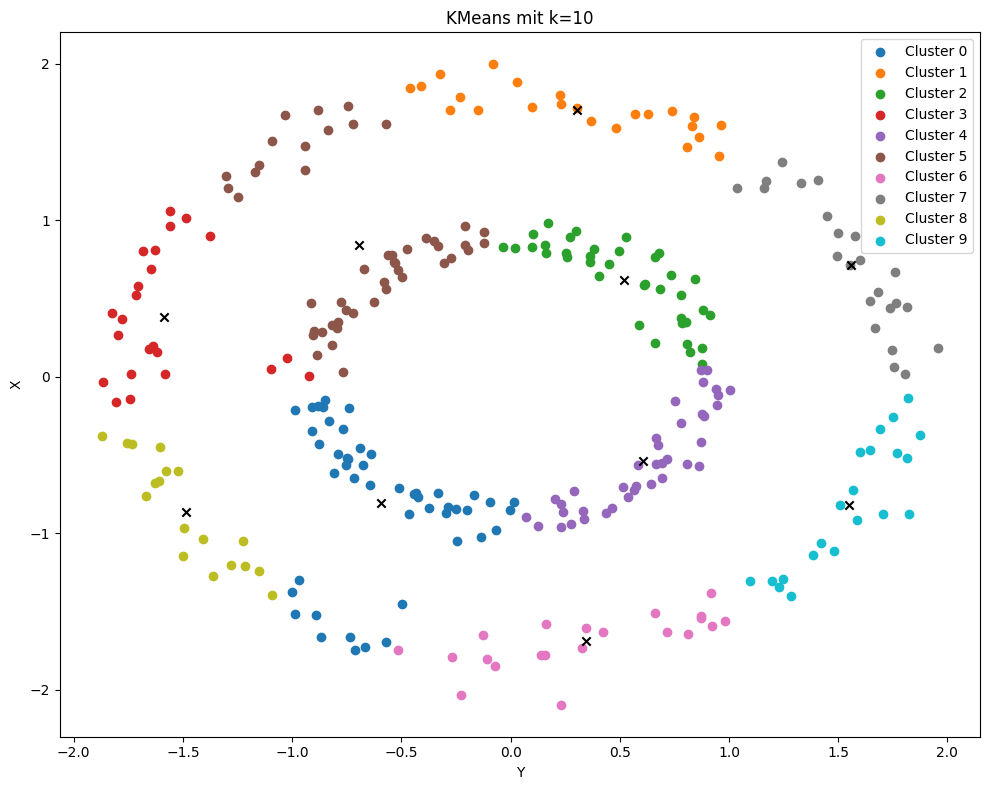

In [218]:
import requests
import json
import matplotlib.pyplot as plt

# Endpunkt für basic KMeans Route 
url = "http://localhost:8080/advanced/perform-advanced-2d-kmeans/"

# Daten für die Anfrage
params = {
    "Column 1": 1,
    "Column 2": 0,
    "distance_metric": "EUCLIDEAN",
    "kmeans_type": "OptimizedKMeans",
    "user_id": 0,
    "request_id": 0
}

# verfügbare dateien sind: 
# "Mall_Customers.csv"
# "xclara.csv"
# "iris.csv"

files = {
  "file": open("circles.csv", "rb") 
}
# Sende POST-Anfrage
response = requests.post(url, files=files, params=params)

# Lade JSON-Antwort in Variable
result = response.json()

# Plotte Ergebnis
plt.figure(figsize=(10, 8))

# Gehe durch jeden Cluster
for cluster in result["clusters"]:
  centroid = cluster["centroid"]
  points = cluster["points"]
  
  # Extrahiere Datenpunkte 
  point_x = [p[result["x_label"]] for p in points]
  point_y = [p[result["y_label"]] for p in points] 
  
  # Plotte Cluster
  plt.scatter(point_x, point_y, label=f"Cluster {cluster['cluster_nr']}")

  # Plotte Zentroid
  plt.scatter(centroid["x"], centroid["y"], color="black", marker="x")
  
# Achsenbeschriftung  
plt.xlabel(result["x_label"])
plt.ylabel(result["y_label"])

plt.legend()
plt.title(f"KMeans mit k={result['k_value']}")
plt.tight_layout()
plt.show()

## Visual response basic 3D clustering

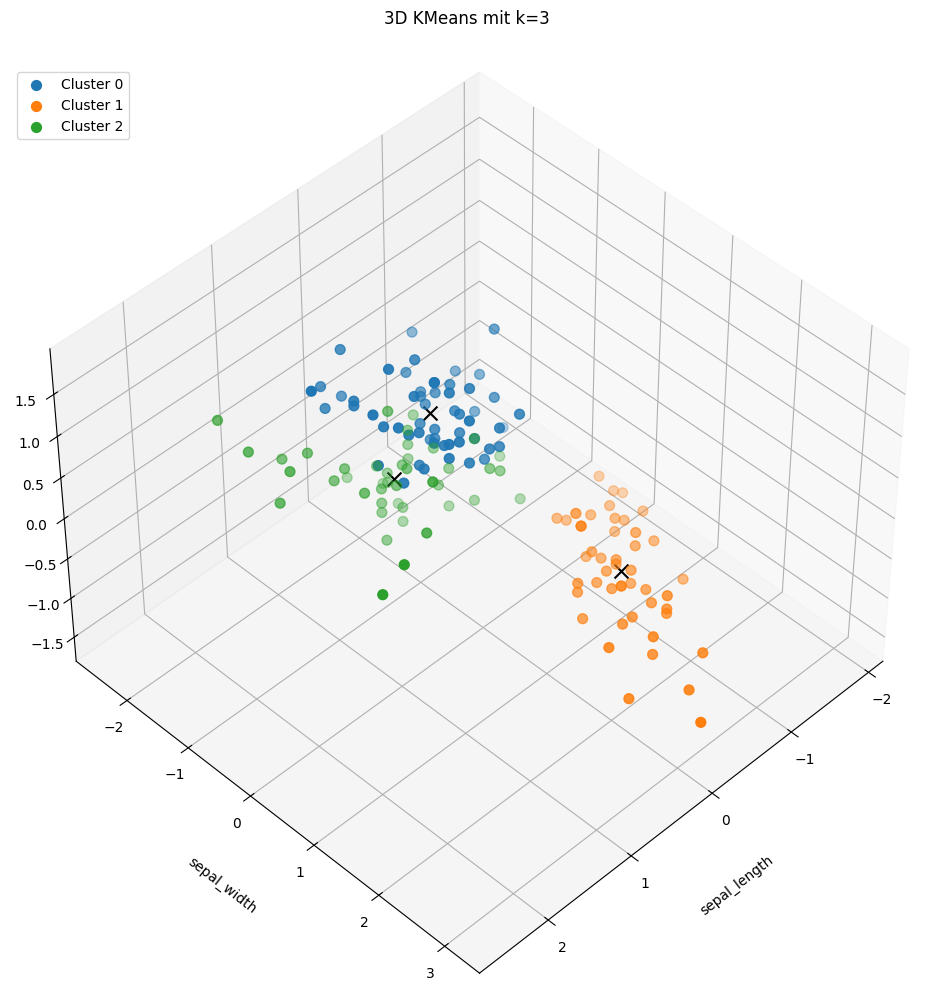

In [224]:
import requests
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Endpunkt für 3D KMeans Route 
url = "http://localhost:8080/basic/perform-3d-kmeans/"

# Daten für die Anfrage
params = {
    "Column 1": 0,
    "Column 2": 1,
    "Column 3": 2,
    "distance_metric": "EUCLIDEAN",
    "kmeans_type": "OptimizedKMeans",
    "n_clusters": 3,
    "user_id": 0,
    "request_id": 0
}

files = {
    "file": open("IRIS.csv", "rb")
}

# Sende POST-Anfrage
response = requests.post(url, files=files, params=params)

# Lade JSON-Antwort in Variable
result = response.json()

# Erstelle 3D-Plot
fig = plt.figure(figsize=(10, 10))  # Erhöhte Grafikgröße
ax = fig.add_subplot(111, projection='3d')

# Gehe durch jeden Cluster
for cluster in result["clusters"]:
    centroid = cluster["centroid"]
    points = cluster["points"]

    # Extrahiere Datenpunkte
    point_x = [p[result["x_label"]] for p in points]
    point_y = [p[result["y_label"]] for p in points]
    point_z = [p[result["z_label"]] for p in points]

    # Plotte Cluster
    ax.scatter(point_x, point_y, point_z, s=50, label=f"Cluster {cluster['cluster_nr']}")

    # Plotte Zentroid
    ax.scatter(centroid["x"], centroid["y"], centroid["z"], color="black", marker="x", s=100)

# Achsenbeschriftung mit erhöhtem Abstand (labelpad)
ax.set_xlabel(result["x_label"], labelpad=20)
ax.set_ylabel(result["y_label"], labelpad=20)
ax.set_zlabel(result["z_label"], labelpad=20)

# Verbesserte Grafikoptionen
ax.grid(True)  # Gitterlinien hinzufügen
ax.view_init(45, 45)  # Ansichtswinkel anpassen

# Platzierung von Titel und Legende anpassen
ax.legend(loc='upper left')
ax.set_title(f"3D KMeans mit k={result['k_value']}", pad=30)  # Erhöhter Abstand des Titels

# Optimiert das Layout
plt.tight_layout()

plt.show()

## Visual response advanced 3D clustering